<h2 style='color:black' align='center'>Image Classification Using CNN for CIFAR-10 dataset</h2>


<img src="cifar-10-db.jpg"/>

<h4 style="color:black">Step 1: Import all needed libraries</h4>

In [21]:
# Import tensorflow for model creation
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image

# Import matplotlib for graph plot
import matplotlib.pyplot as plt

# Import numpy for array manipulation
import numpy as np

<h4 style="color:black">Step 2: Load the dataset</h4>

In [22]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [23]:
X_test.shape

(10000, 32, 32, 3)

In [24]:
y_train.shape

(50000, 1)

Cifar-10 has 50,000 labelled images of different objects with a resolution of 32 x 32.
All of these images are colored

In [25]:
# Check the labels
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a label set of 2D array.
However, for our classification, having a 1D array is good enough.
so we will need to convert this to a 1D array

In [26]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

Do the same for test dataset

In [27]:
y_test = y_test.reshape(-1,)
y_test.shape

(10000,)

In [28]:
# Create an array of names
class_labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

Let's plot some images to see what they are 

In [29]:
# Plots the image with index
def plot_image(image, label):
    plt.figure(figsize = (7,1))
    plt.imshow(image)
    plt.xlabel(label)

See the first Image of Training dataset

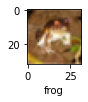

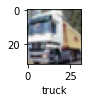

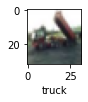

In [30]:
plot_image(X_train[0], class_labels[y_train[0]])
plot_image(X_train[1], class_labels[y_train[1]])
plot_image(X_train[2], class_labels[y_train[2]])

<h4 style="color:black">Step 3: Perform some pre processing</h4>

In [31]:
# Convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the training Data
X_train = X_train / 255.0
X_test = X_test / 255.0

<h4 style="color:black">Step 4: Build a convolutional neural network</h4>

In [32]:
cnn = models.Sequential([
    # Hidden layer 1
    # CONV 1a
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)),
    
    # CONV 1b
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)),
    
    # Pool 1
    layers.MaxPooling2D((2, 2)),
    
    # Hidden layer 2
    # CONV 2a
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)),
    
    # CONV 2b
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)),
    
    # Pool 2
    layers.MaxPooling2D((2, 2)),
    
    # Hidden layer 3
    # CONV 3a
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)),
    
    # CONV 3b
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)),
    
    # Pool 3
    layers.MaxPooling2D((2, 2)),
    
    # Fully connected layer
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
])

<h4 style="color:black">Step 5: Compile the model</h4>

In [33]:
cnn.compile(
    optimizer=SGD(lr=0.001, momentum=0.9),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)


/home/praharshb/.local/lib/python3.10/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


<h4 style="color:black">Step 6: Fit the model</h4>

In [34]:
cnn.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 3.8527 - accuracy: 0.1005
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 3.8090 - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 3.8090 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 82s 52ms/step - loss: 3.8090 - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 80s 51ms/step - loss: 3.8090 - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 80s 51ms/step - loss: 3.8090 - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 3.8090 - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 79s 51ms/step - loss: 3.8090 - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] - 76s 49ms/step - loss: 3.8090 - accuracy: 0.1000
Epoch 10/10
1563/1563 [==============================] - 89s 57m

<h4 style="color:black">Step 7: Get the accuracy of the current model</h4>

In [35]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 3.8091 - accuracy: 0.1000


[3.8090555667877197, 0.10000000149011612]

<h4 style="color:black">Step 8: Save the model</h4>

In [37]:
# save model
cnn.save('final_model.h5')
# models.load_model('final_model.h5')

<h4 style="color:black">Step 9: Predict the sample image</h4>

In [38]:
# Loads the image, ref: https://stackoverflow.com/a/47341572/6559381
def load_image(img_path):

    img = image.load_img(img_path, target_size=(32, 32))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img.astype('float32')
    img /= 255
    img = img.reshape(1, 32, 32, 3)
    return img

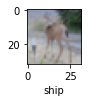

In [41]:
# load the sample image
img = load_image("sample.png")

# Predict the given image
y_pred = cnn.predict(img)

# The predicted object is an array of confidence scores of all the classes
# So, getting the max value from the bunch
y_pred_classes = np.argmax(y_pred)

# Show the prediction
class_labels[y_pred_classes]
plot_image(img[0], class_labels[y_pred_classes])

<h4 style="color:black">References</h4>

This code was inspired from Codebasic's work: https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb
More about CNN for CIFAR-10 https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/